| Problem | Formula|Search Domain|
|---      |----    |----|
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|

In [25]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# LTDZ1 problem 
## - (#variables / #objectives)

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [21]:

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])

def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point



ltdz1 = result.loc[result['Problem']=='LTDZ1'].reset_index(drop=True)
ltdz1.loc[:,'nadir_point'] = ltdz1['path'].apply(nadir_get)
print(f"The number of records {len(ltdz1)}")

The number of records 13


In [22]:
#path and image path indicating location of objective file and visualization file
ltdz1.iloc[:,-2:].head(5)

,image_location,nadir_point
0,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,"[-1.5037965008990624, -1.8972940308416424, -1...."
1,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,"[-1.446468265707866, -1.8155124447149635, -1.1..."
2,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,"[-1.0396535932031015, -1.4457121602891956, -1...."
3,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,"[-1.3385527952074756, -1.5862013039828593, -1...."
4,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,"[-1.2030993774667076, -1.2829387656492675, -1...."


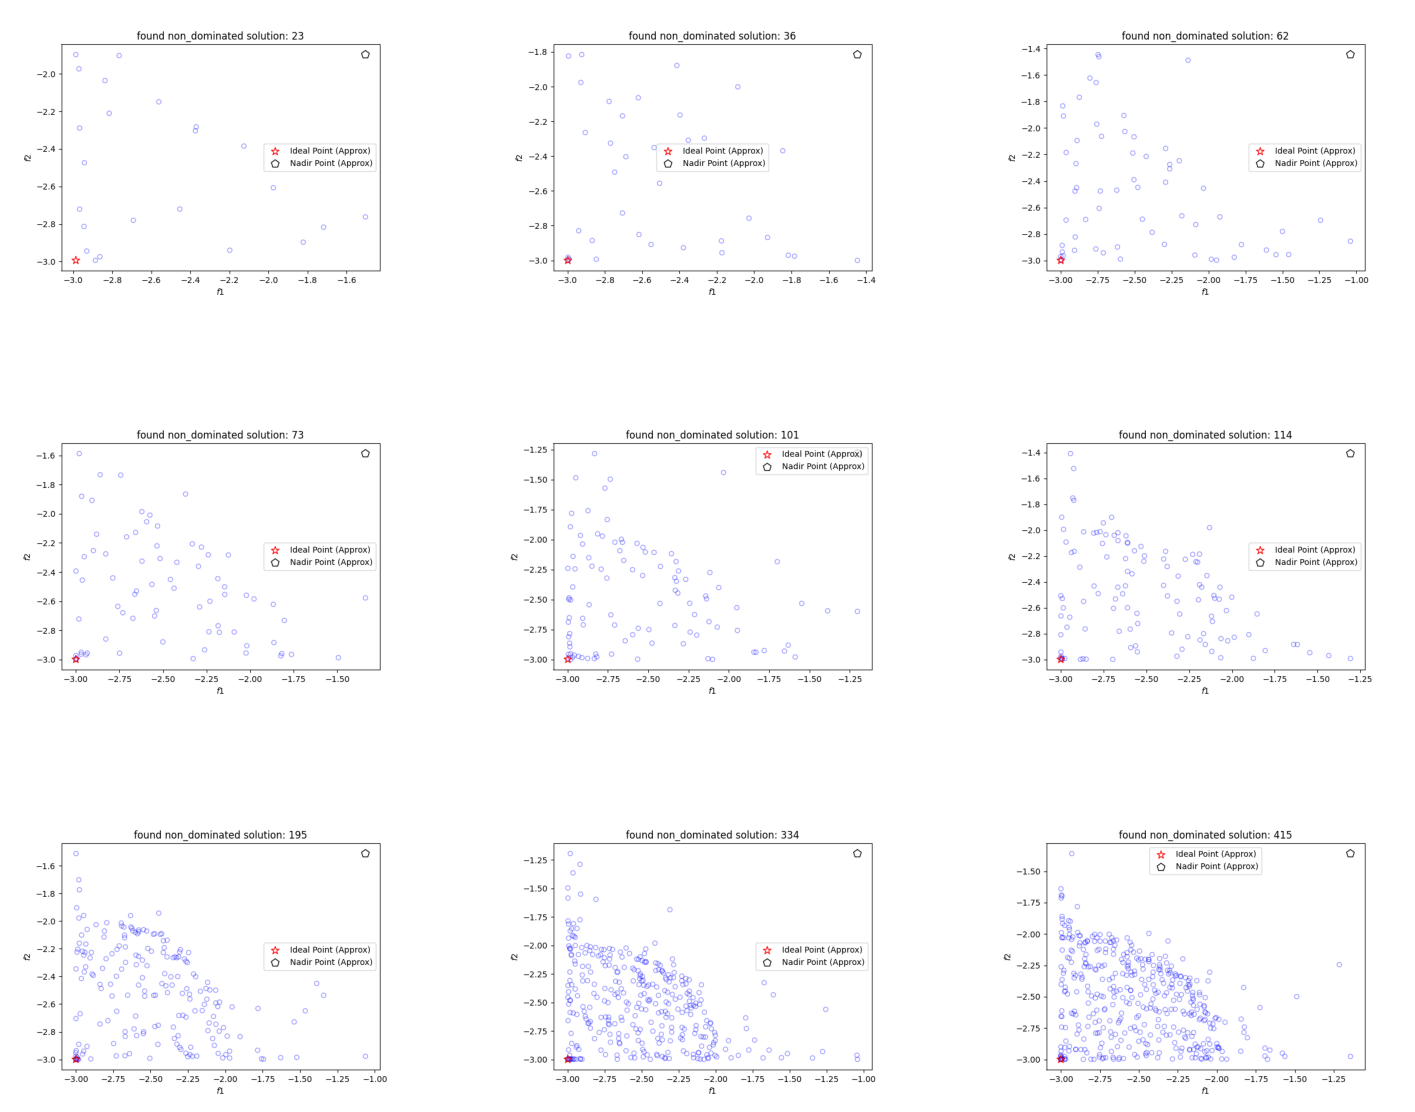

In [23]:
folder_2 = os.path.dirname(folder)
folder_2
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = ltdz1['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [33]:
nadir_arr  = np.array([i for i in np.array(ltdz1['nadir_point'])])
print(np.round(np.max(nadir_arr, axis=0)))

ref_point = np.array([-1, -1, -1,])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ltdz1_pf' ))
ltdz1_table_1 = hv_result(ltdz1)
ltdz1_table_1

[-1. -1. -1.]
ref_point is [-1 -1 -1]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,LTDZ1,3,3,23,6.5949177,0.1511306,"[-1.5037965008990624, -1.8972940308416424, -1....",100,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.5...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0160000,[-1 -1 -1]
1,LTDZ1,3,3,36,6.8583155,0.1254883,"[-1.446468265707866, -1.8155124447149635, -1.1...",200,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0171621,[-1 -1 -1]
2,LTDZ1,3,3,62,6.9127065,0.1283506,"[-1.0396535932031015, -1.4457121602891956, -1....",300,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.e...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0320249,[-1 -1 -1]
3,LTDZ1,3,3,73,7.1276407,0.0930601,"[-1.3385527952074756, -1.5862013039828593, -1....",500,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.8...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0261619,[-1 -1 -1]
4,LTDZ1,3,3,101,7.1187709,0.0839925,"[-1.2030993774667076, -1.2829387656492675, -1....",600,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.d...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0396550,[-1 -1 -1]
5,LTDZ1,3,3,114,7.2185073,0.0681980,"[-1.3077293879024425, -1.4072762497893103, -1....",1000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0385830,[-1 -1 -1]
6,LTDZ1,3,3,195,7.3204076,0.0474035,"[-1.0629278699277576, -1.5115529502700658, -1....",3000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.7...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0965610,[-1 -1 -1]
7,LTDZ1,3,3,334,7.3644054,0.0358028,"[-1.0427900940483315, -1.1935919309750986, -1....",6000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.1660500,[-1 -1 -1]
8,LTDZ1,3,3,415,7.3930360,0.0301167,"[-1.143573087366719, -1.3593291105852485, -1.1...",10000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.2073889,[-1 -1 -1]
9,LTDZ1,3,3,534,7.4047450,0.0247815,"[-1.1879825022500101, -1.0832804126246507, -1....",15000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.1...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.3534858,[-1 -1 -1]


In [37]:
ref_point = np.array([5, 5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ltdz1_pf' ))
ltdz1_table_2= hv_result(ltdz1)
#ltdz1_table_2

ref_point is [5 5 5]


In [39]:
pd.concat([ltdz1_table_1,ltdz1_table_2]).to_excel('Excel/Excel_Random/ltdz1.xlsx', engine = 'xlsxwriter')

## LTDZ1 reference 0,0,0. Also compute IDG with respect to the front attached  zdt10_9p.txt

In [40]:
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
print(pf.shape)

(60, 3)


Text(0.5, 0.92, 'Paretofront')

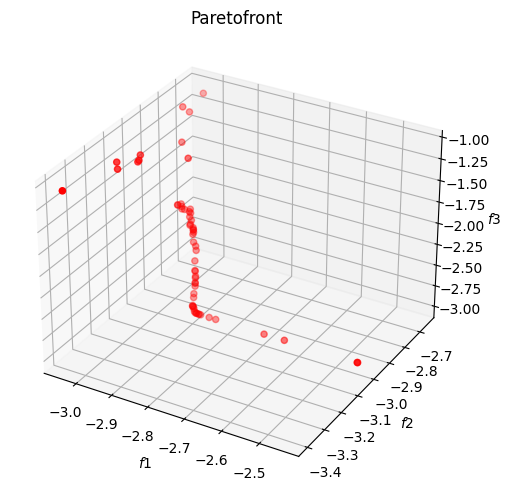

In [42]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(pf[:,0], pf[:,1], pf[:,2], c='r', marker='o')
ax.set_xlabel('$f1$')
ax.set_ylabel('$f2$')
ax.set_zlabel('$f3$')
ax.set_title(f'Paretofront')

In [46]:
ref_point = np.array([0, 0, 0])
nadir_arr  = np.array([i for i in np.array(ltdz1['nadir_point'])])
print(np.round(np.max(nadir_arr, axis=0)))
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
ltdz1_zdt10_9P = hv_result(ltdz1)
ltdz1_zdt10_9P

[-1. -1. -1.]
ref_point is [0 0 0]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,LTDZ1,3,3,23,24.9174978,0.4898295,"[-1.5037965008990624, -1.8972940308416424, -1....",100,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.5...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0007167,[0 0 0]
1,LTDZ1,3,3,36,25.5192220,0.4489104,"[-1.446468265707866, -1.8155124447149635, -1.1...",200,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0011108,[0 0 0]
2,LTDZ1,3,3,62,25.6836399,0.4561362,"[-1.0396535932031015, -1.4457121602891956, -1....",300,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.e...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0022211,[0 0 0]
3,LTDZ1,3,3,73,26.0589157,0.4290998,"[-1.3385527952074756, -1.5862013039828593, -1....",500,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.8...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0025549,[0 0 0]
4,LTDZ1,3,3,101,25.9902172,0.4322676,"[-1.2030993774667076, -1.2829387656492675, -1....",600,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.d...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0042570,[0 0 0]
5,LTDZ1,3,3,114,26.1711032,0.4211405,"[-1.3077293879024425, -1.4072762497893103, -1....",1000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0048671,[0 0 0]
6,LTDZ1,3,3,195,26.2931786,0.4177507,"[-1.0629278699277576, -1.5115529502700658, -1....",3000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.7...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0115907,[0 0 0]
7,LTDZ1,3,3,334,26.3497438,0.4138800,"[-1.0427900940483315, -1.1935919309750986, -1....",6000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0658789,[0 0 0]
8,LTDZ1,3,3,415,26.3879517,0.4161663,"[-1.143573087366719, -1.3593291105852485, -1.1...",10000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0445008,[0 0 0]
9,LTDZ1,3,3,534,26.3995076,0.4135465,"[-1.1879825022500101, -1.0832804126246507, -1....",15000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.1...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0736949,[0 0 0]


In [49]:
ref_point = np.array([1, 1, 1])
ltdz1_zdt10_9P_table_2 = hv_result(ltdz1)
ltdz1_zdt10_9P_table_2

ref_point is [1 1 1]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,LTDZ1,3,3,23,61.0491983,0.4898295,"[-1.5037965008990624, -1.8972940308416424, -1....",100,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.5...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0006282,[1 1 1]
1,LTDZ1,3,3,36,62.0972784,0.4489104,"[-1.446468265707866, -1.8155124447149635, -1.1...",200,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0012579,[1 1 1]
2,LTDZ1,3,3,62,62.4367603,0.4561362,"[-1.0396535932031015, -1.4457121602891956, -1....",300,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.e...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0015068,[1 1 1]
3,LTDZ1,3,3,73,62.9852292,0.4290998,"[-1.3385527952074756, -1.5862013039828593, -1....",500,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.8...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0019891,[1 1 1]
4,LTDZ1,3,3,101,62.8507790,0.4322676,"[-1.2030993774667076, -1.2829387656492675, -1....",600,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.d...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0031590,[1 1 1]
5,LTDZ1,3,3,114,63.1218551,0.4211405,"[-1.3077293879024425, -1.4072762497893103, -1....",1000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0036039,[1 1 1]
6,LTDZ1,3,3,195,63.2632864,0.4177507,"[-1.0629278699277576, -1.5115529502700658, -1....",3000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.7...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0087752,[1 1 1]
7,LTDZ1,3,3,334,63.3347720,0.4138800,"[-1.0427900940483315, -1.1935919309750986, -1....",6000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.4...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0222602,[1 1 1]
8,LTDZ1,3,3,415,63.3828064,0.4161663,"[-1.143573087366719, -1.3593291105852485, -1.1...",10000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.2...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0338819,[1 1 1]
9,LTDZ1,3,3,534,63.3942073,0.4135465,"[-1.1879825022500101, -1.0832804126246507, -1....",15000,Result/Random_Search/LTDZ1/LTDZ1_Obj-3_Var-3.1...,Result/Images/Random_Search/LTDZ1/LTDZ1_Obj-3_...,0.0525730,[1 1 1]


In [ ]:
pd.concat([ltdz1_zdt10_9P,ltdz1_zdt10_9P_table_2]).to_excel('Excel/Excel_Random/ltdz1_zdt10_9P.xlsx', engine = 'xlsxwriter')